In [4]:
#predicting digits from images say 1 to 10.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import datasets
%matplotlib inline
digits = datasets.load_digits()#to load the digits

In [5]:
#visualize the shape of the digits
print("Image Data Shape",digits.data.shape)
print("Label Data Shape",digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


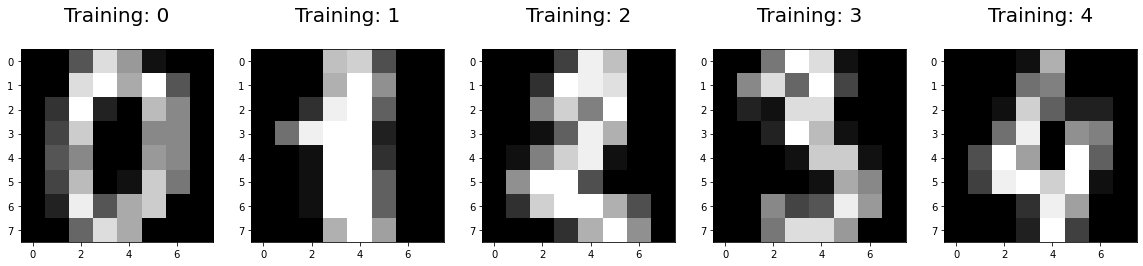

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training: %i\n' %label,fontsize = 20)
#the below are 8*8 matrix pixels
#each pixel is activated or not
#each number has a pattern of the activation of pixels
#our model is gonna learn that pattern of activation of pixels

In [10]:
#splitting data as training and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)
#.23 ie.23% of the entire dataset is taken for testing and 77% is taken for training
#train_test_split does that work .we need to pass the propotion like .23,.33,etc.
#these are labels x_train,x_test,y_train,y_test.

In [11]:
print(x_train.shape) # how many entries are there #there are 1383 observations in train

(1383, 64)


In [16]:
print(x_test.shape) #414 observations in test

(414, 64)


In [13]:
print(y_test.shape)

(414,)


In [14]:
print(y_train.shape)

(1383,)


In [18]:
#import logistic regresiion library
from sklearn.linear_model import LogisticRegression

In [21]:
#creating an instance of logistic regression
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(x_train,y_train) #passing our training dataset into the model

F:\S.downloads\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [22]:
print(logisticRegr.predict(x_test[0].reshape(1,-1)))
#predicting one image (the first entry in my test data set x_test[0])

[4]


In [24]:
#predicting 0:10 entries of test set
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [25]:
#now testing the entire dataset
predictions = logisticRegr.predict(x_test)


In [26]:
score= logisticRegr.score(x_test,y_test)
print(score)
#score method to find the % of accuracy

0.9516908212560387


In [27]:
#visualizing the accuracy of the model using confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [28]:
cm = metrics.confusion_matrix(y_test,predictions)
#predictions are what the system has predicted for test dataset y_test
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  1  0  0  0  0  1  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 43  0  0  0  1]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  1  0  0  0 36  1]
 [ 0  0  0  1  0  1  0  0  1 31]]


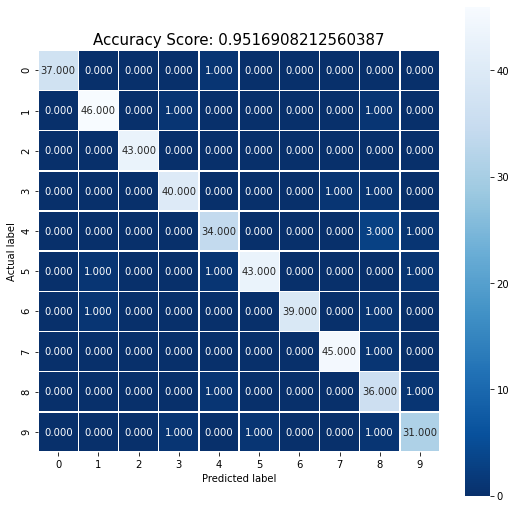

In [29]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size = 15);

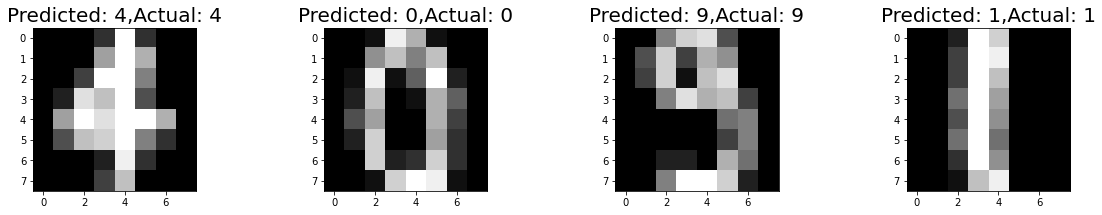

In [30]:
index = 0
classifiedIndex = []
for predict,actual in zip(predictions, y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("Predicted: {},Actual: {}".format(predictions[wrong],y_test[wrong]), fontsize=20)